## Generates Fig 5. E, F, G
##### Last update 2023-02-10

This notebook enables you to compute the figure panels shown based on apparent binding affinities


In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mticker

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['legend.fontsize'] = 6

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
from soursop.sstrajectory import SSTrajectory

In [2]:
# define this so we can read in nucleotides
NA_EXTENSION = ['D5P', 'DPC',  'DPU',  'DPT',  'DPA',  'DPG',  'R5P',  'RPC' , 'RPU',  'RPT',  'RPA',  'RPG']



In [3]:
# read in simulation data
NTD_KA_star = np.loadtxt('data/NTD_normalized_Ka.csv', delimiter=',')
RBD_KA_star = np.loadtxt('data/RBD_normalized_Ka.csv', delimiter=',')
NTD_RBD_KA_star = np.loadtxt('data/NTDRBD_normalized_Ka.csv', delimiter=',')
raw_exp_Ka_NTDRBD = np.loadtxt('data/experimental_data_NTDRBD.csv', delimiter=',')
raw_exp_Ka_RBD = np.loadtxt('data/experimental_data_RBD.csv', delimiter=',')


### Error propagation of ratios
To propagate the error in our ratios for calculating $K_A^*$ we use the following expression:

$\dfrac{R_{error}}{R} = \sqrt{\Big(\dfrac{A_{error}}{A}\Big)^2 + \Big(\dfrac{B_{error}}{B}\Big)^2}$

Where here $R$ and $R_{error}$ are the ratio and ratio error, and then $A$, $B$, $A_{error}$ and $B_{error}$ are the values of the numerator and denominator of our ratios and the associated errors, respectively. 

We propagate 'error' here as standard deviation for consistency with the simulation error propagation. As mentioned the standard error of the mean from independent simulations yields errors that are essentiall smaller than the tick marks, such that std provides an assessment of the distribution of Ka values obtained (as opposed to the 'error' in our ability to estimate the true population expected value).

In [4]:
# get the raw Ka value (in nM-1) for NTD-RBD + (rU)_25
# 5 here is U25, 2 and 3 reflects mean and std from that data, respectively.
ref_Ka = raw_exp_Ka_NTDRBD[5][2]
ref_Ka_std = raw_exp_Ka_NTDRBD[5][3]

# get normalized Ka_star by dividing the raw apparent K_a values by the ref_Ka
exp_NTD_RBD_KA_star = raw_exp_Ka_NTDRBD.transpose()[2]/ref_Ka
exp_RBD_KA_star = raw_exp_Ka_RBD.transpose()[2]/ref_Ka


## Error propagation (see above for explanation)
# NTD-RBD error
tmp_all_std = raw_exp_Ka_NTDRBD.transpose()[3]  
tmp_all_mean = raw_exp_Ka_NTDRBD.transpose()[2]
exp_NTD_RBD_KA_star_std = np.sqrt(np.power(tmp_all_std/tmp_all_mean,2) + np.power(ref_Ka_std/ref_Ka,2))*exp_NTD_RBD_KA_star

# RBD error
tmp_all_std = raw_exp_Ka_RBD.transpose()[3]
tmp_all_mean = raw_exp_Ka_RBD.transpose()[2]
exp_RBD_KA_star_std = np.sqrt(np.power(tmp_all_std/tmp_all_mean,2) + np.power(ref_Ka_std/ref_Ka,2))*exp_RBD_KA_star






In [5]:
# data prep for the plot below
RNA_lengths  = NTD_KA_star.transpose()[0]
NTD_KA = NTD_KA_star.transpose()[1]
NTD_KA_std = NTD_KA_star.transpose()[2]

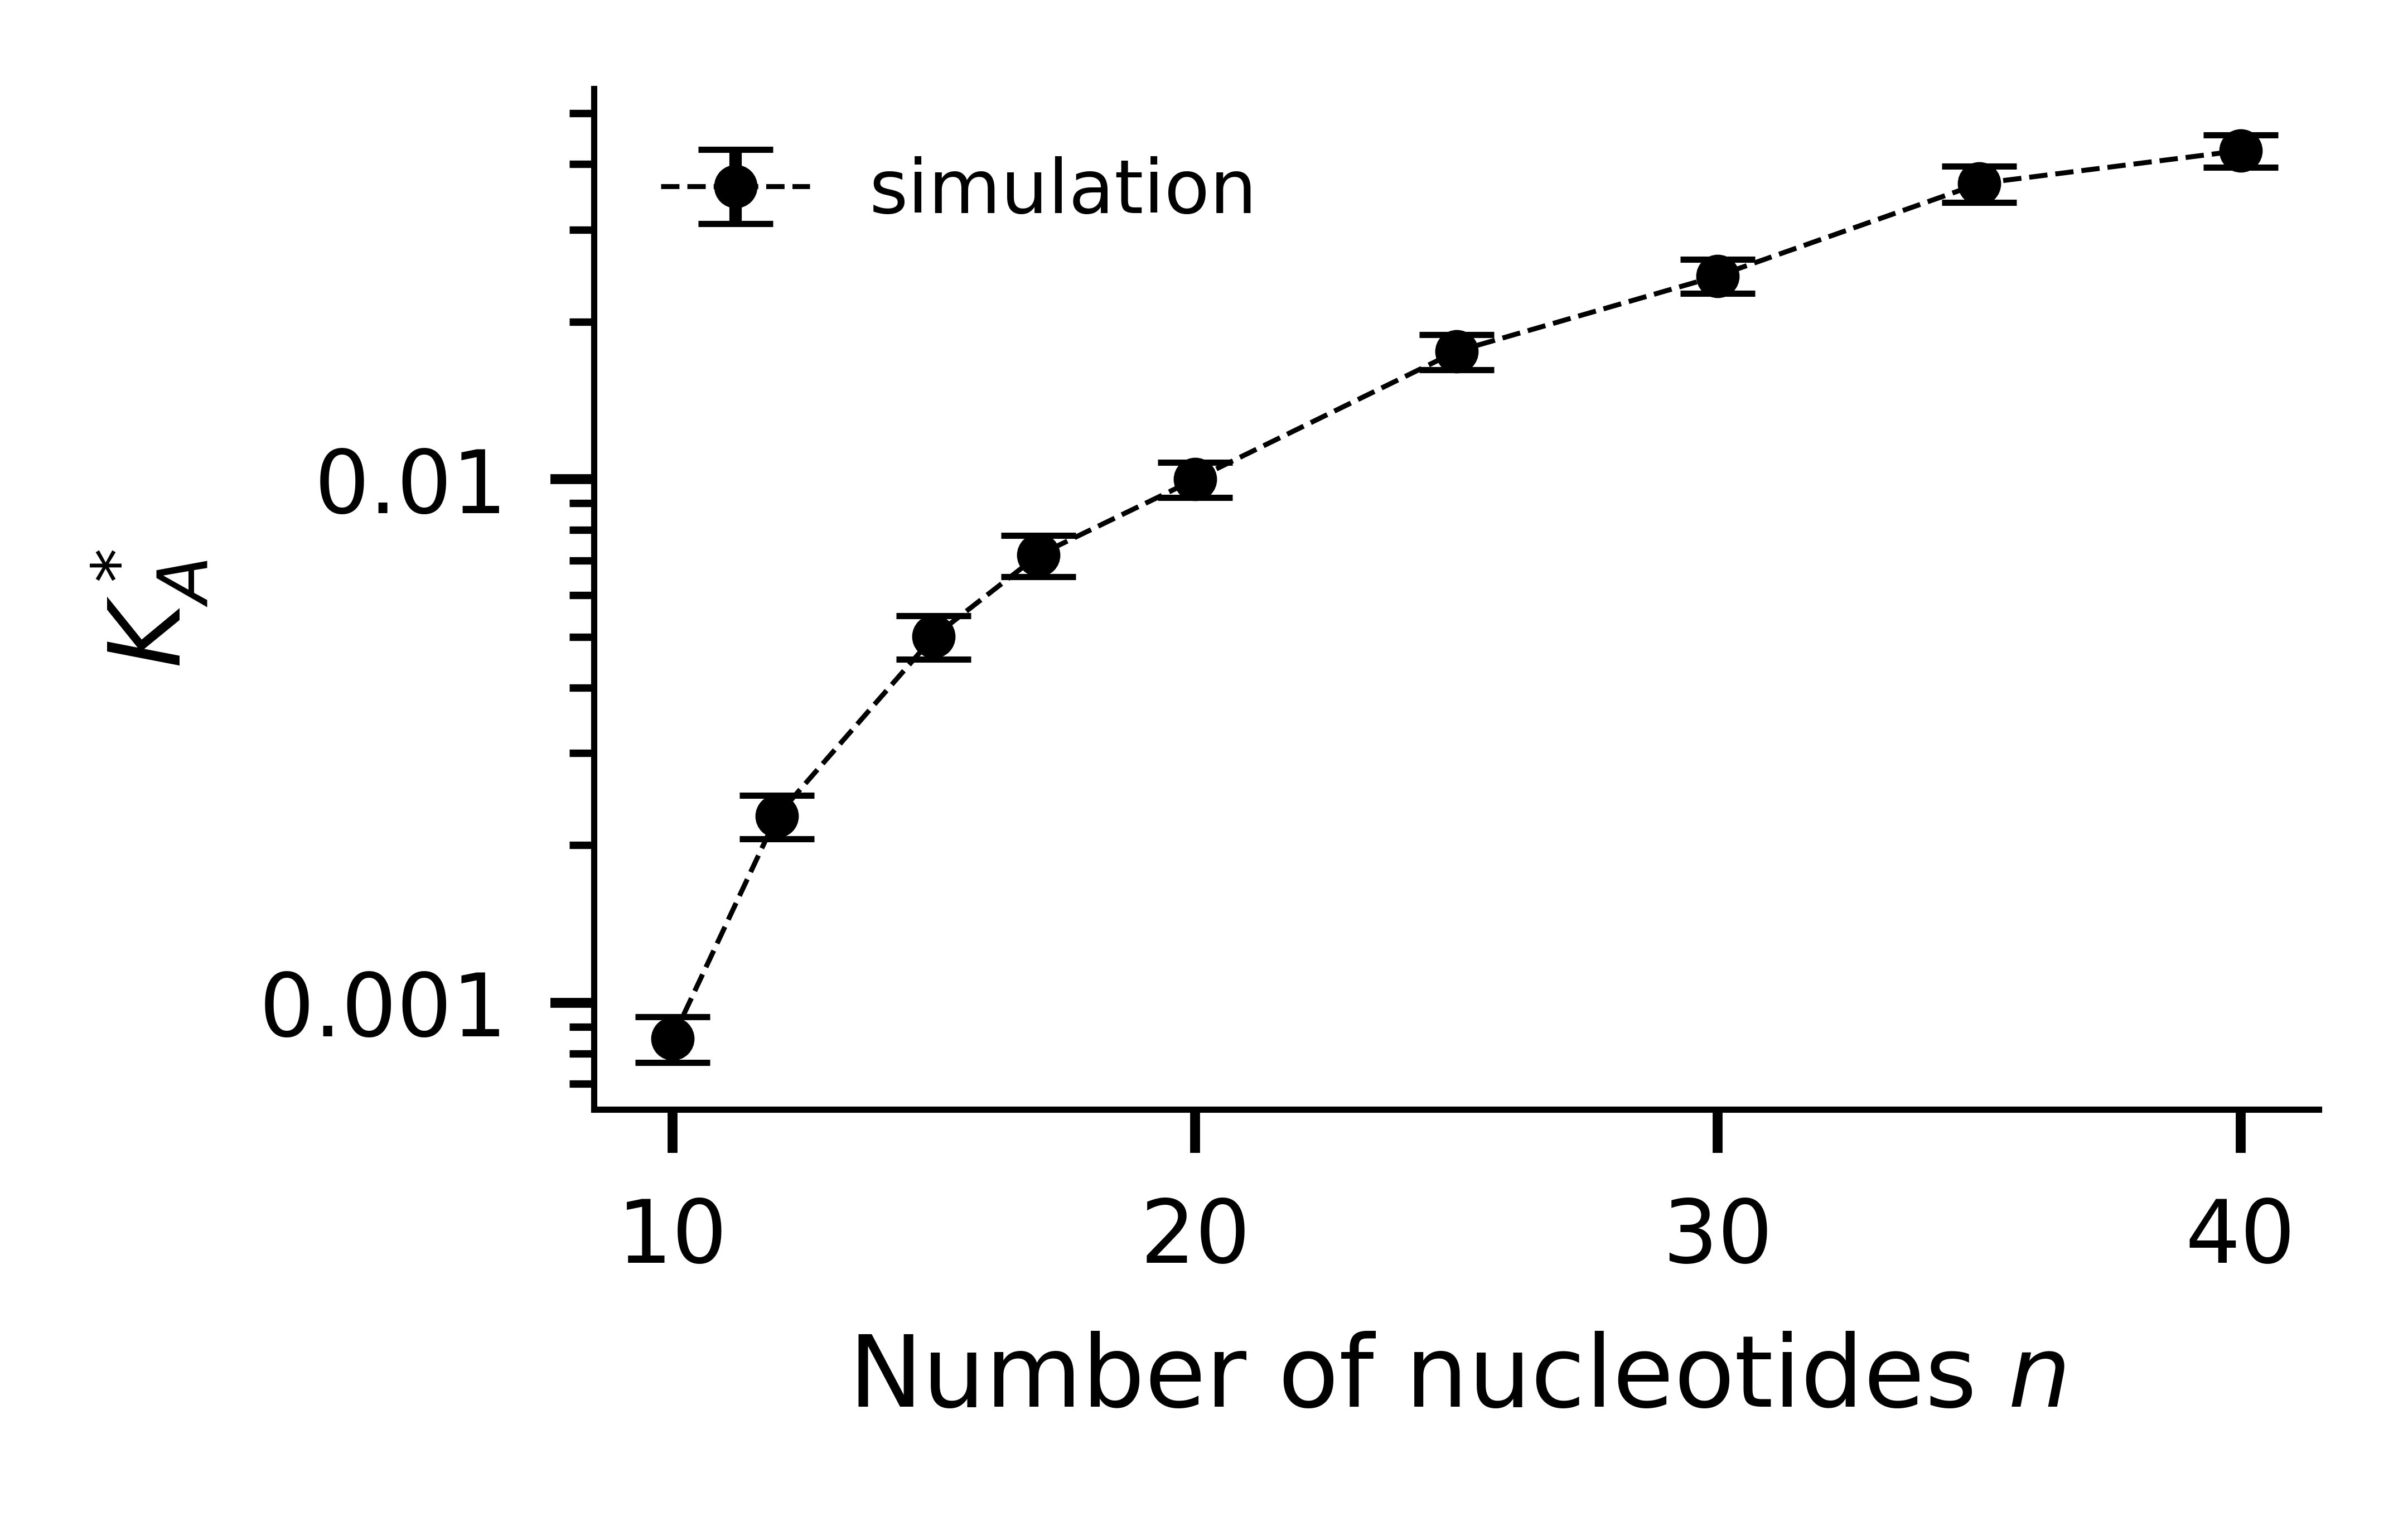

In [19]:
figure(None, (2.8,1.8), dpi=800)

ax = plt.subplot()

ax.errorbar(x = RNA_lengths, y = NTD_KA,
             yerr = NTD_KA_std, fmt='.--', linewidth=0.4, label='simulation', color = 'k',
             ecolor='k', elinewidth=1, capsize=3, markeredgewidth=0.5)

# FYI:
# markeredgewidth - sets width of cap lines
# elinewidth - sets width of line connecting the caps
# capsize - set size of caps

# turn off lines on right and left side of plot
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

# set y axis to be log scale
plt.yscale('log')
plt.ylabel(r'$K_A^*$ ',fontsize=8)
plt.xlabel(r'Number of nucleotides $n$',fontsize=8)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.legend(fontsize=6, frameon=False)

# avoids using scientific notatio for y-axis
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# removes trailing zero on y axis
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%g'))

plt.tight_layout()

plt.savefig("NTD_Ka_star.pdf")

In [20]:
# data prep for the RBD plot
RNA_lengths  = NTD_KA_star.transpose()[0]
RBD_KA = RBD_KA_star.transpose()[1]
RBD_KA_std = RBD_KA_star.transpose()[2]

RNA_lengths_RBD_exp = raw_exp_Ka_RBD.transpose()[0]
 


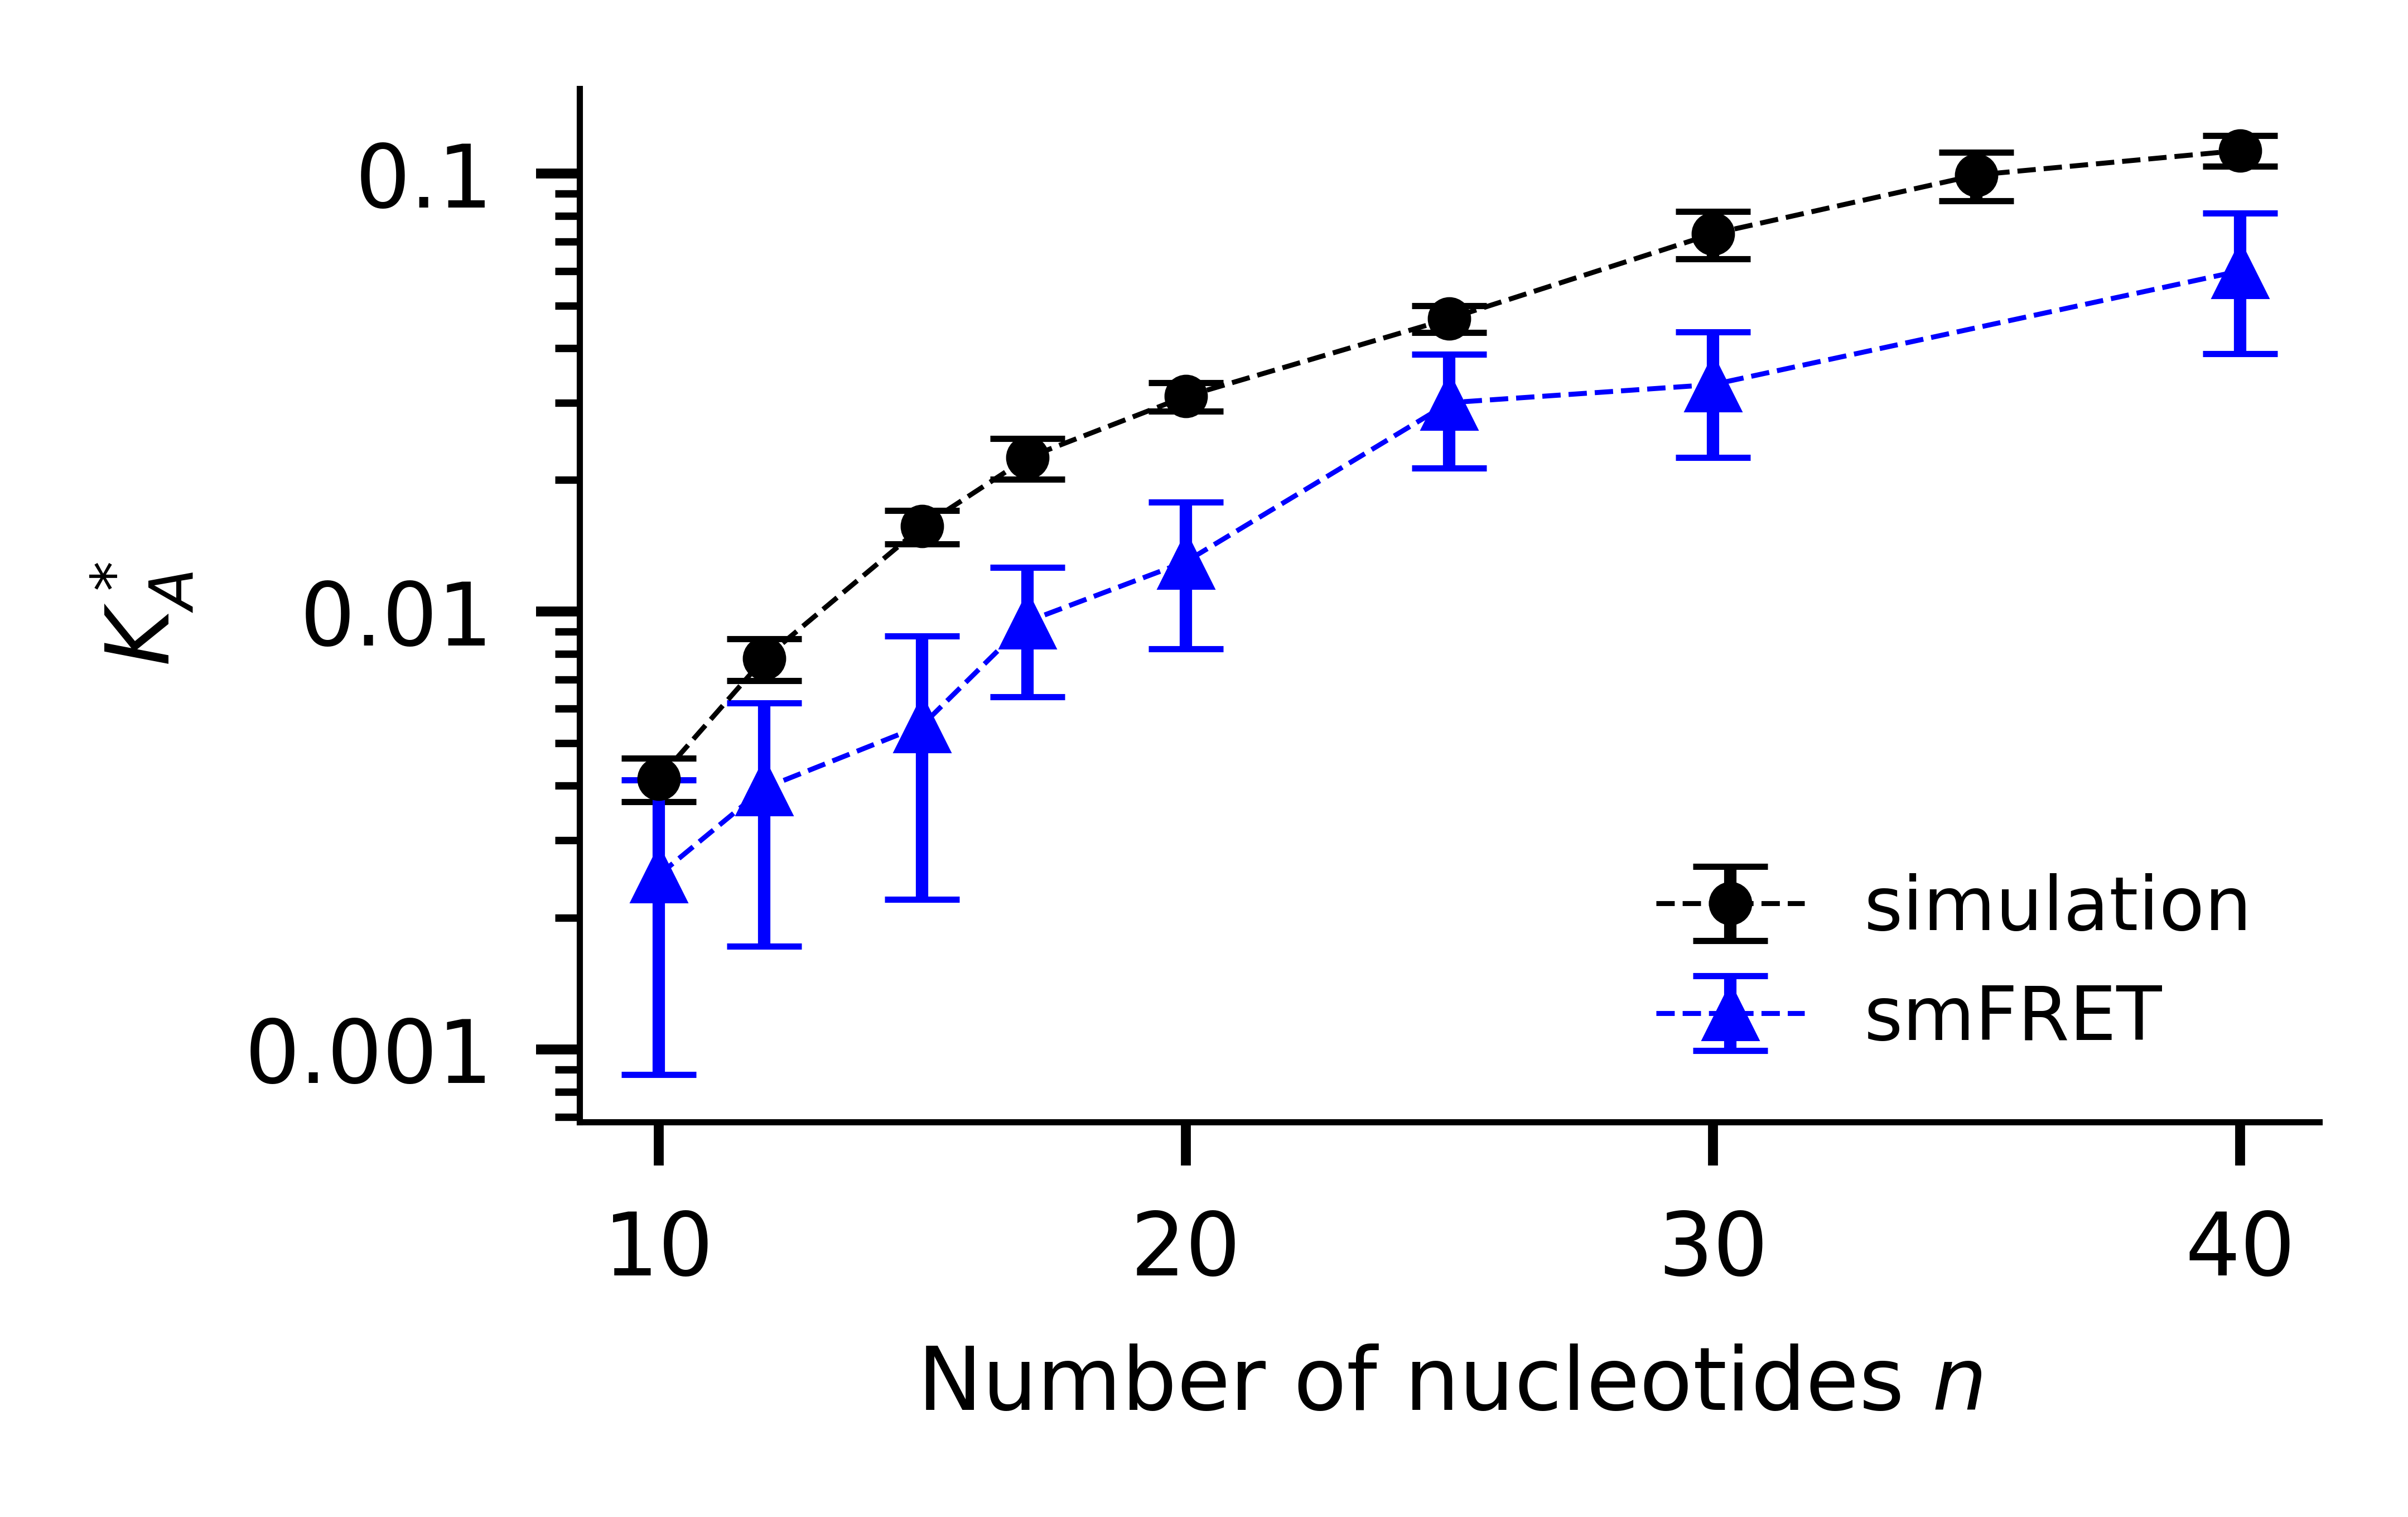

In [21]:
figure(None, (2.8,1.8), dpi=800)

ax = plt.subplot()

ax.errorbar(x = RNA_lengths, y = RBD_KA,
             yerr = RBD_KA_std, fmt='.--', linewidth=0.4, label='simulation', color = 'k',
             ecolor='k', elinewidth=1, capsize=3, markeredgewidth=0.5)

ax.errorbar(x = RNA_lengths_RBD_exp, y = exp_RBD_KA_star,
             yerr = exp_RBD_KA_star_std, fmt='^--', linewidth=0.4, ms=4, label='smFRET', color = 'b',
             ecolor='b', elinewidth=1, capsize=3, markeredgewidth=0.5)


# FYI:
# markeredgewidth - sets width of cap lines
# elinewidth - sets width of line connecting the caps
# capsize - set size of caps

# turn off lines on right and left side of plot
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
plt.legend(fontsize=6, frameon=False)

# set y axis to be log scale
plt.yscale('log')
plt.ylabel(r'$K_A^*$ ',fontsize=7)
plt.xlabel(r'Number of nucleotides $n$',fontsize=7)
plt.yticks(fontsize=7) 
plt.xticks(fontsize=7)


# avoids using scientific notatio for y-axis
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# removes trailing zero on y axis
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%g'))

plt.tight_layout()

plt.savefig("RBD_Ka_star.pdf")

In [22]:
# data prep for the NTD-RBD plot
RNA_lengths  = NTD_RBD_KA_star.transpose()[0]
NTD_RBD_KA       = NTD_RBD_KA_star.transpose()[1]
NTD_RBD_KA_std   = NTD_RBD_KA_star.transpose()[2]


 


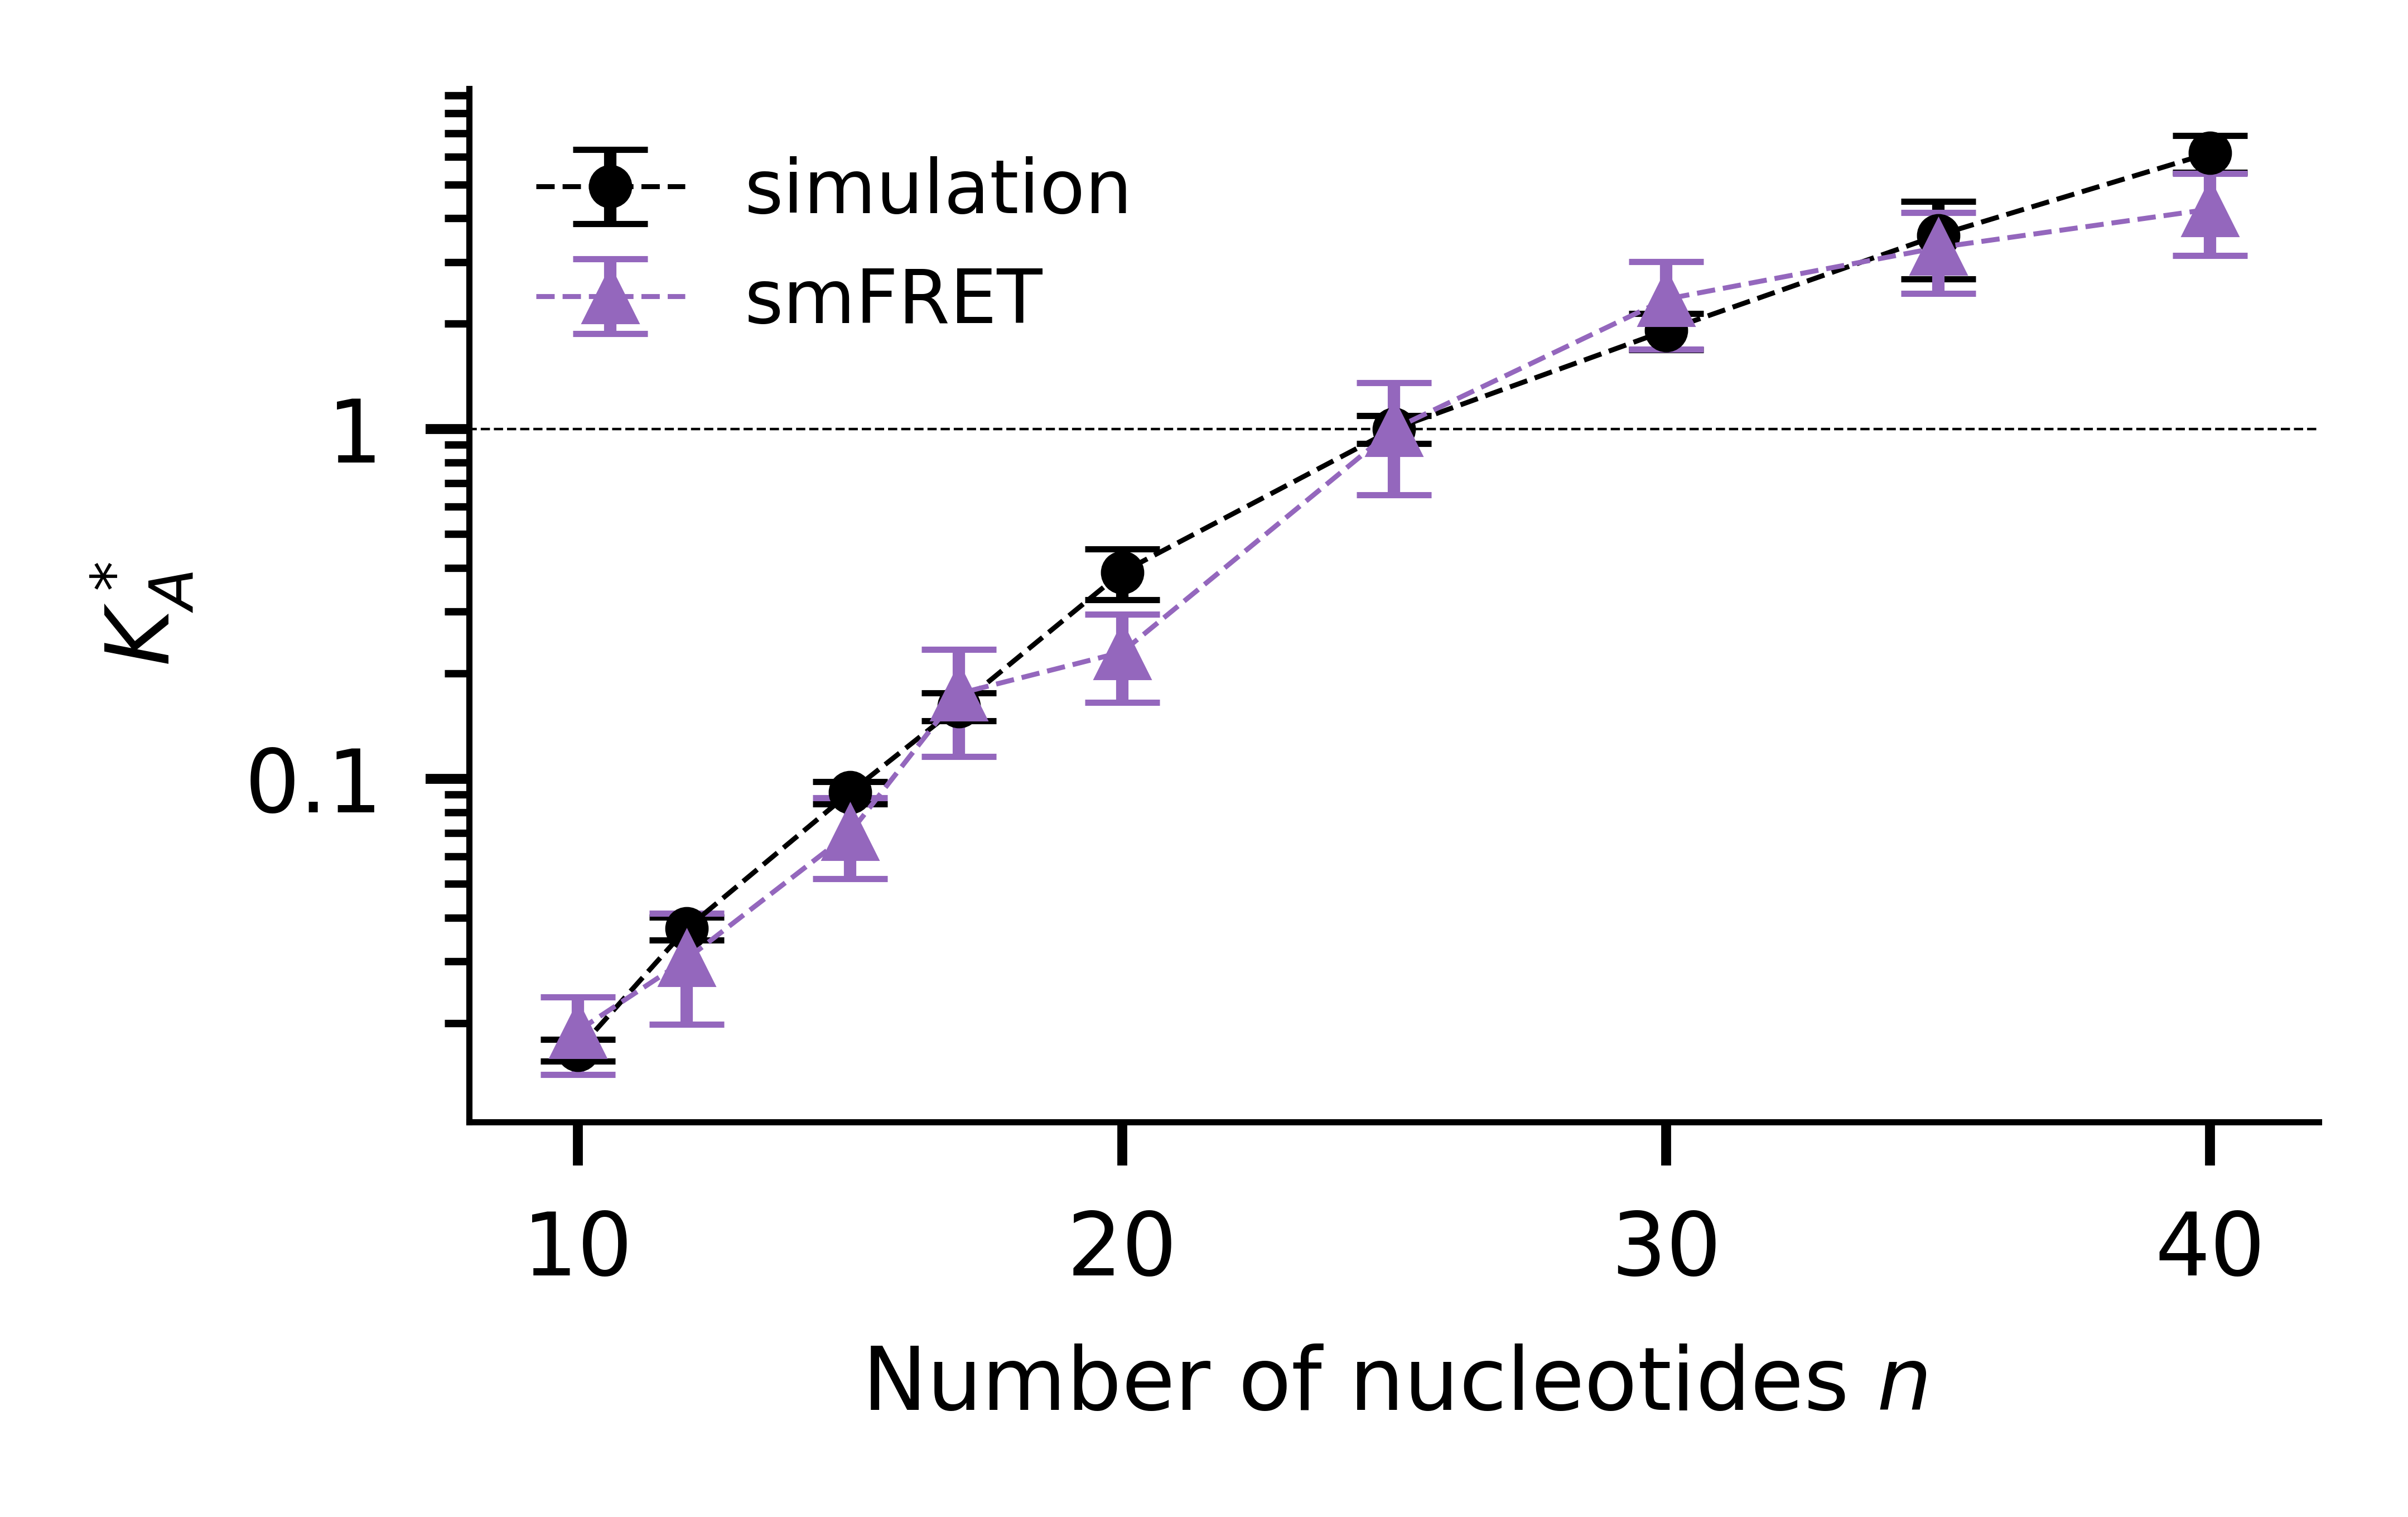

In [23]:
figure(None, (2.8,1.8), dpi=800)

ax = plt.subplot()

ax.errorbar(x = RNA_lengths, y = NTD_RBD_KA,
             yerr = NTD_RBD_KA_std, fmt='.--', linewidth=0.4, label='simulation', color = 'k',
             ecolor='k', elinewidth=1, capsize=3, markeredgewidth=0.5)

ax.errorbar(x = RNA_lengths, y = exp_NTD_RBD_KA_star,
             yerr = exp_NTD_RBD_KA_star_std, fmt='^--', ms=4, linewidth=0.4, label='smFRET', color = '#9467BD',
             ecolor='#9467BD', elinewidth=1, capsize=3, markeredgewidth=0.5)


# FYI:
# markeredgewidth - sets width of cap lines
# elinewidth - sets width of line connecting the caps
# capsize - set size of caps

# turn off lines on right and left side of plot
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

# set y axis to be log scale
plt.yscale('log')
plt.ylabel(r'$K_A^*$ ',fontsize=7)
plt.xlabel(r'Number of nucleotides $n$',fontsize=7)
plt.yticks(fontsize=7) 
plt.xticks(fontsize=7)
plt.plot([0,50], [1,1],'--k', linewidth=0.2)
plt.xlim([8,42])
plt.legend(fontsize=6, frameon=False)


# avoids using scientific notatio for y-axis
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# removes trailing zero on y axis
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%g'))

plt.tight_layout()

plt.savefig("NTD_RBD_Ka_star.pdf")